<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AQI-Analysis-for-Cleveland,-Los-Angeles,-New-York,-and-Tampa-(2020-2021-Data)" data-toc-modified-id="AQI-Analysis-for-Cleveland,-Los-Angeles,-New-York,-and-Tampa-(2020-2021-Data)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AQI Analysis for Cleveland, Los Angeles, New York, and Tampa (2020-2021 Data)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Cleveland,-OH" data-toc-modified-id="Cleveland,-OH-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Cleveland, OH</a></span></li></ul></li></ul></li><li><span><a href="#Data-Manipulation-and-Transformation" data-toc-modified-id="Data-Manipulation-and-Transformation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Manipulation and Transformation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Los-Angeles,-CA" data-toc-modified-id="Los-Angeles,-CA-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Los Angeles, CA</a></span></li><li><span><a href="#New-York,-NY" data-toc-modified-id="New-York,-NY-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>New York, NY</a></span></li><li><span><a href="#Tampa,-FL" data-toc-modified-id="Tampa,-FL-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Tampa, FL</a></span></li></ul></li></ul></li><li><span><a href="#1999-to-2022-data" data-toc-modified-id="1999-to-2022-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>1999 to 2022 data</a></span><ul class="toc-item"><li><span><a href="#Cumulative-Moving-Average" data-toc-modified-id="Cumulative-Moving-Average-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cumulative Moving Average</a></span></li></ul></li></ul></div>

# AQI Analysis for Cleveland, Los Angeles, New York, and Tampa (2020-2021 Data)

1. Data Wrangling

In [21]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pickle
import seaborn as sns
%matplotlib inline
import string
import collections

from pandas.plotting import register_matplotlib_converters
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction import text
import warnings
warnings.filterwarnings('ignore')

### Cleveland, OH

In [23]:
df_cle20 = pd.read_excel(r'D:\AQIdata\ad_viz_tile_data_cle20.xlsx')
df_cle20.head()

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,2020-01-01,44,PM2.5,Cleveland Near Road,39-035-0073,AQS
1,2020-01-02,26,Ozone,GT Craig NCore,39-035-0060,AQS
2,2020-01-03,57,PM2.5,Cleveland Near Road,39-035-0073,AQS
3,2020-01-04,48,PM2.5,Cleveland Near Road,39-035-0073,AQS
4,2020-01-05,31,Ozone,GT Craig NCore,39-035-0060,AQS


In [24]:
df_cle20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            731 non-null    datetime64[ns]
 1    AQI Value      731 non-null    int64         
 2   Main Pollutant  731 non-null    object        
 3   Site Name       731 non-null    object        
 4   Site ID         731 non-null    object        
 5   Source          731 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 34.4+ KB


In [25]:
df_cle20.isnull().sum()

Date              0
 AQI Value        0
Main Pollutant    0
Site Name         0
Site ID           0
Source            0
dtype: int64

In [26]:
df_cle20['Main Pollutant'].unique()

array(['PM2.5', 'Ozone', 'PM10', 'NO2'], dtype=object)

In [27]:
pivoted = df_cle20.pivot_table(index=['Date', 'Main Pollutant'])
pivoted

,,AQI Value
Date,Main Pollutant,
2020-01-01,PM2.5,44
2020-01-02,Ozone,26
2020-01-03,PM2.5,57
2020-01-04,PM2.5,48
2020-01-05,Ozone,31
...,...,...
2021-12-27,PM2.5,56
2021-12-28,PM2.5,45
2021-12-29,PM2.5,48


In [28]:
reset = pivoted.reset_index()
reset

,Date,Main Pollutant,AQI Value
0,2020-01-01,PM2.5,44
1,2020-01-02,Ozone,26
2,2020-01-03,PM2.5,57
3,2020-01-04,PM2.5,48
4,2020-01-05,Ozone,31
...,...,...,...
726,2021-12-27,PM2.5,56
727,2021-12-28,PM2.5,45
728,2021-12-29,PM2.5,48
729,2021-12-30,PM2.5,64


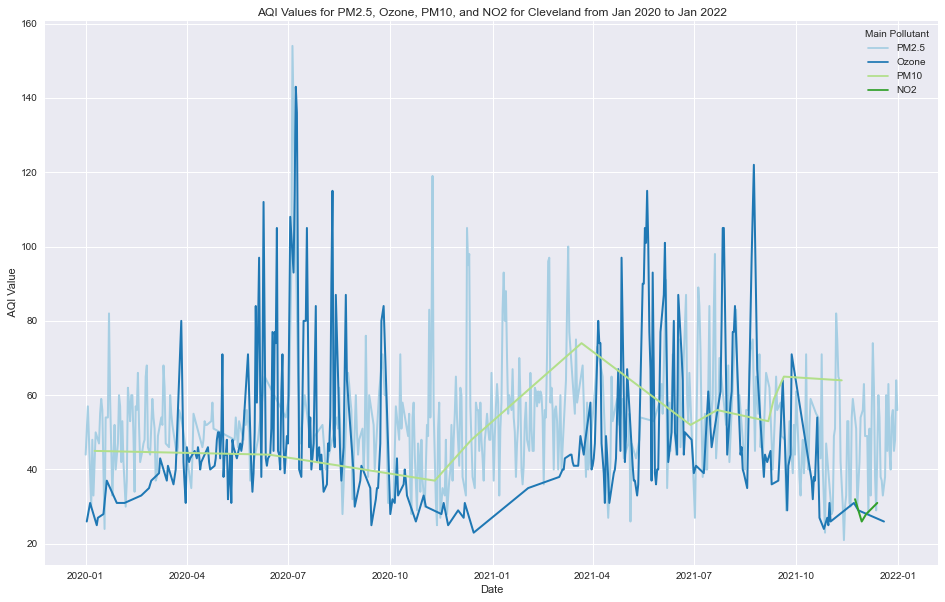

In [31]:
# Create time series for Main Pollutants
plt.style.use('seaborn')
plt.figure(figsize=(16,10))
sns.lineplot(data=pivoted.reset_index(), x='Date', y=' AQI Value', hue='Main Pollutant', palette='Paired', linewidth= 2.0)
plt.title('AQI Values for PM2.5, Ozone, PM10, and NO2 for Cleveland from Jan 2020 to Jan 2022')
plt.show()

In [34]:
# Create separate df for each pollutant
pm25_cle = reset[reset["Main Pollutant"]=="PM2.5"]
ozo_cle = reset[reset["Main Pollutant"]=="Ozone"]
pm10_cle = reset[reset["Main Pollutant"]=="PM10"]
no2_cle = reset[reset["Main Pollutant"]=="NO2"]

In [35]:
print(pm25_cle.info())
print(ozo_cle.info())
print(pm10_cle.info())
print(no2_cle.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            438 non-null    datetime64[ns]
 1   Main Pollutant  438 non-null    object        
 2    AQI Value      438 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 13.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 1 to 718
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            278 non-null    datetime64[ns]
 1   Main Pollutant  278 non-null    object        
 2    AQI Value      278 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 8 to 680
Data columns (total 3 columns):
 #   Column         

In [36]:
# Find out 95% quantile for each main pollutant
print('PM2.5 95 quantile: ', pm25_cle.quantile(0.95))
print('Ozone 95 quantile: ', ozo_cle.quantile(0.95))
print('PM10 95 quantile: ', pm10_cle.quantile(0.95))
print('NO2 95 quantile: ', no2_cle.quantile(0.95))

PM2.5 95 quantile:   AQI Value    82.15
Name: 0.95, dtype: float64
Ozone 95 quantile:   AQI Value    101.0
Name: 0.95, dtype: float64
PM10 95 quantile:   AQI Value    69.5
Name: 0.95, dtype: float64
NO2 95 quantile:   AQI Value    31.85
Name: 0.95, dtype: float64


In [37]:
# Averages for each pollutant
print('PM2.5 average: ', pm25_cle.mean())
print('Ozone average: ', ozo_cle.mean())
print('PM10 average: ', pm10_cle.mean())
print('NO2 average: ', no2_cle.mean())

PM2.5 average:   AQI Value    52.947489
dtype: float64
Ozone average:   AQI Value    51.111511
dtype: float64
PM10 average:   AQI Value    54.272727
dtype: float64
NO2 average:   AQI Value    29.25
dtype: float64


# Data Manipulation and Transformation

In [38]:
# Create max threshold and find outliers from it
max_thresh = pm25_cle.quantile(0.95)
outliers = pm25_cle[pm25_cle[' AQI Value'].values > max_thresh.values]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 185 to 585
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            22 non-null     datetime64[ns]
 1   Main Pollutant  22 non-null     object        
 2    AQI Value      22 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 704.0+ bytes


In [40]:
# Do the same thing with min threshold, except set quantile to 5%
min_thresh = pm25_cle.quantile(0.05)
outliers1 = pm25_cle[pm25_cle[' AQI Value'].values > min_thresh.values]
outliers1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            414 non-null    datetime64[ns]
 1   Main Pollutant  414 non-null    object        
 2    AQI Value      414 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 12.9+ KB


In [41]:
# Create new ds with no outliers beyond 95% quantile
pm25_cle20_nomaxthresh = pm25_cle[(pm25_cle[' AQI Value'].values < max_thresh.values)]

In [42]:
pm25_cle20_nomaxthresh

,Date,Main Pollutant,AQI Value
0,2020-01-01,PM2.5,44
2,2020-01-03,PM2.5,57
3,2020-01-04,PM2.5,48
5,2020-01-06,PM2.5,30
6,2020-01-07,PM2.5,48
...,...,...,...
726,2021-12-27,PM2.5,56
727,2021-12-28,PM2.5,45
728,2021-12-29,PM2.5,48
729,2021-12-30,PM2.5,64


In [43]:
# Save this file
pm25_cle20_nomaxthresh.to_excel('cle_pm25_20to21.xlsx')

### Los Angeles, CA

In [44]:
df_la20 = pd.read_excel(r'D:\AQIdata\ad_viz_tile_data_la20.xlsx')
df_la20.head()

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,2020-01-01,102,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AQS
1,2020-01-02,72,PM2.5,Compton,06-037-1302,AQS
2,2020-01-03,87,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AQS
3,2020-01-04,104,PM2.5,Compton,06-037-1302,AQS
4,2020-01-05,103,PM2.5,Compton,06-037-1302,AQS


In [45]:
df_la20.isnull().sum()

Date              0
 AQI Value        0
Main Pollutant    0
Site Name         0
Site ID           0
Source            0
dtype: int64

In [46]:
# Find unique values for 'Main Pollutant'
df_la20['Main Pollutant'].unique()

array(['PM2.5', 'NO2', 'PM10', 'Ozone'], dtype=object)

In [48]:
pivoted1 = df_la20.pivot_table(index=['Date', 'Main Pollutant'])
pivoted1

,,AQI Value
Date,Main Pollutant,
2020-01-01,PM2.5,102
2020-01-02,PM2.5,72
2020-01-03,PM2.5,87
2020-01-04,PM2.5,104
2020-01-05,PM2.5,103
...,...,...
2021-12-27,PM2.5,59
2021-12-28,NO2,49
2021-12-29,PM2.5,41


In [49]:
reset1 = pivoted1.reset_index()
reset1

,Date,Main Pollutant,AQI Value
0,2020-01-01,PM2.5,102
1,2020-01-02,PM2.5,72
2,2020-01-03,PM2.5,87
3,2020-01-04,PM2.5,104
4,2020-01-05,PM2.5,103
...,...,...,...
726,2021-12-27,PM2.5,59
727,2021-12-28,NO2,49
728,2021-12-29,PM2.5,41
729,2021-12-30,NO2,42


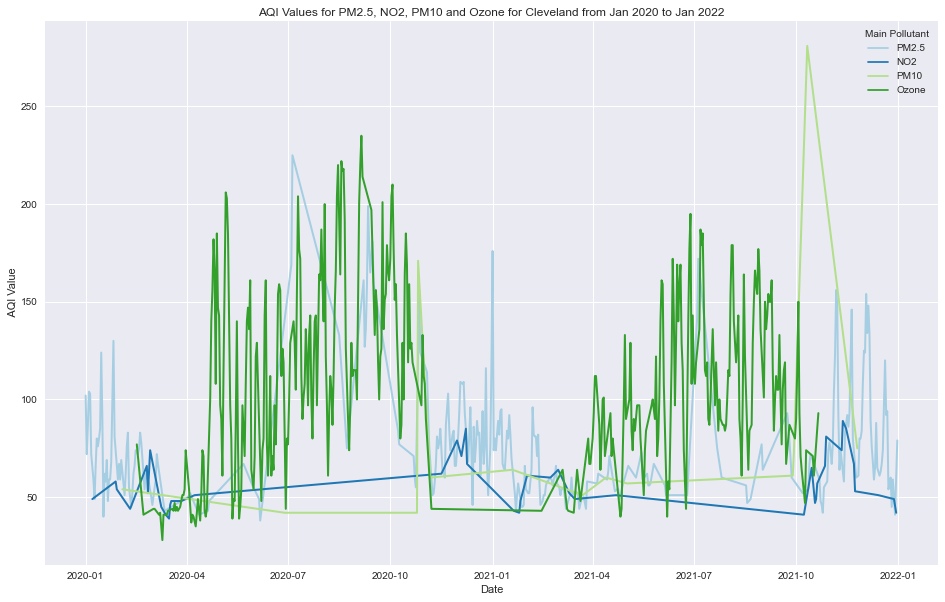

In [50]:
# Create time series for Main Pollutants
plt.style.use('seaborn')
plt.figure(figsize=(16,10))
sns.lineplot(data=pivoted1.reset_index(), x='Date', y=' AQI Value', hue='Main Pollutant', palette='Paired', linewidth= 2.0)
plt.title('AQI Values for PM2.5, NO2, PM10 and Ozone for Cleveland from Jan 2020 to Jan 2022')
plt.show()

In [54]:
# Create separate df for each pollutant
pm25_la = reset1[reset1["Main Pollutant"]=="PM2.5"]
no2_la = reset1[reset1["Main Pollutant"]=="NO2"]
pm10_la = reset1[reset1["Main Pollutant"]=="PM10"]
ozo_la = reset1[reset1["Main Pollutant"]=="Ozone"]

In [55]:
print(pm25_la.info())
print(no2_la.info())
print(pm10_la.info())
print(ozo_la.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            304 non-null    datetime64[ns]
 1   Main Pollutant  304 non-null    object        
 2    AQI Value      304 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 9.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 6 to 729
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            44 non-null     datetime64[ns]
 1   Main Pollutant  44 non-null     object        
 2    AQI Value      44 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 33 to 694
Data columns (total 3 columns):
 #   Column          

In [57]:
# Find out 95% quantile for each main pollutant
print('PM2.5 95 quantile: ', pm25_la.quantile(0.95))
print('NO2 95 quantile: ', no2_la.quantile(0.95))
print('PM10 95 quantile: ', pm10_la.quantile(0.95))
print('Ozone 95 quantile: ', ozo_la.quantile(0.95))

PM2.5 95 quantile:   AQI Value    147.7
Name: 0.95, dtype: float64
NO2 95 quantile:   AQI Value    84.4
Name: 0.95, dtype: float64
PM10 95 quantile:   AQI Value    215.0
Name: 0.95, dtype: float64
Ozone 95 quantile:   AQI Value    189.75
Name: 0.95, dtype: float64


In [58]:
# Averages for each pollutant
print('PM2.5 average: ', pm25_la.mean())
print('NO2 average: ', no2_la.mean())
print('PM10 average: ', pm10_la.mean())
print('Ozone average: ', ozo_la.mean())

PM2.5 average:   AQI Value    76.289474
dtype: float64
NO2 average:   AQI Value    57.136364
dtype: float64
PM10 average:   AQI Value    83.923077
dtype: float64
Ozone average:   AQI Value    109.92973
dtype: float64


In [59]:
# Create max threshold and find outliers from it
max_thresh1 = pm25_la.quantile(0.95)
outliers2 = pm25_la[pm25_la[' AQI Value'].values > max_thresh1.values]
outliers2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 185 to 704
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            16 non-null     datetime64[ns]
 1   Main Pollutant  16 non-null     object        
 2    AQI Value      16 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 512.0+ bytes


In [60]:
# Do the same thing with min threshold, except set quantile to 5%
min_thresh1 = pm25_la.quantile(0.05)
outliers3 = pm25_la[pm25_la[' AQI Value'].values > min_thresh1.values]
outliers3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            284 non-null    datetime64[ns]
 1   Main Pollutant  284 non-null    object        
 2    AQI Value      284 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.9+ KB


In [61]:
# Create new ds with no outliers beyond 95% quantile
pm25_la20_nomaxthresh = pm25_la[(pm25_la[' AQI Value'].values < max_thresh1.values)]

In [62]:
pm25_la20_nomaxthresh

,Date,Main Pollutant,AQI Value
0,2020-01-01,PM2.5,102
1,2020-01-02,PM2.5,72
2,2020-01-03,PM2.5,87
3,2020-01-04,PM2.5,104
4,2020-01-05,PM2.5,103
...,...,...,...
724,2021-12-25,PM2.5,60
725,2021-12-26,PM2.5,45
726,2021-12-27,PM2.5,59
728,2021-12-29,PM2.5,41


In [63]:
# Save file
pm25_la20_nomaxthresh.to_excel('la_pm25_20to21.xlsx')

### New York, NY

In [64]:
df_ny20 = pd.read_excel(r'D:\AQIdata\ad_viz_tile_data_ny20.xlsx')
df_ny20.head()

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,2020-01-01,36,PM2.5,Intermediate School 143,36-061-0115,AQS
1,2020-01-02,56,PM2.5,Intermediate School 143,36-061-0115,AQS
2,2020-01-03,68,PM2.5,Fort Lee Near Road,34-003-0010,AQS
3,2020-01-04,63,PM2.5,Fort Lee Near Road,34-003-0010,AQS
4,2020-01-05,37,PM2.5,CCNY,36-061-0135,AQS


In [65]:
df_ny20.isnull().sum()

Date              0
 AQI Value        0
Main Pollutant    0
Site Name         0
Site ID           0
Source            0
dtype: int64

In [67]:
# Find unique values for 'Main Pollutant'
df_ny20['Main Pollutant'].unique()

array(['PM2.5', 'NO2', 'Ozone'], dtype=object)

In [68]:
pivoted2 = df_ny20.pivot_table(index=['Date', 'Main Pollutant'])
pivoted2

,,AQI Value
Date,Main Pollutant,
2020-01-01,PM2.5,36
2020-01-02,PM2.5,56
2020-01-03,PM2.5,68
2020-01-04,PM2.5,63
2020-01-05,PM2.5,37
...,...,...
2021-12-27,NO2,32
2021-12-28,PM2.5,52
2021-12-29,PM2.5,66


In [69]:
reset2 = pivoted2.reset_index()
reset2

,Date,Main Pollutant,AQI Value
0,2020-01-01,PM2.5,36
1,2020-01-02,PM2.5,56
2,2020-01-03,PM2.5,68
3,2020-01-04,PM2.5,63
4,2020-01-05,PM2.5,37
...,...,...,...
726,2021-12-27,NO2,32
727,2021-12-28,PM2.5,52
728,2021-12-29,PM2.5,66
729,2021-12-30,PM2.5,76


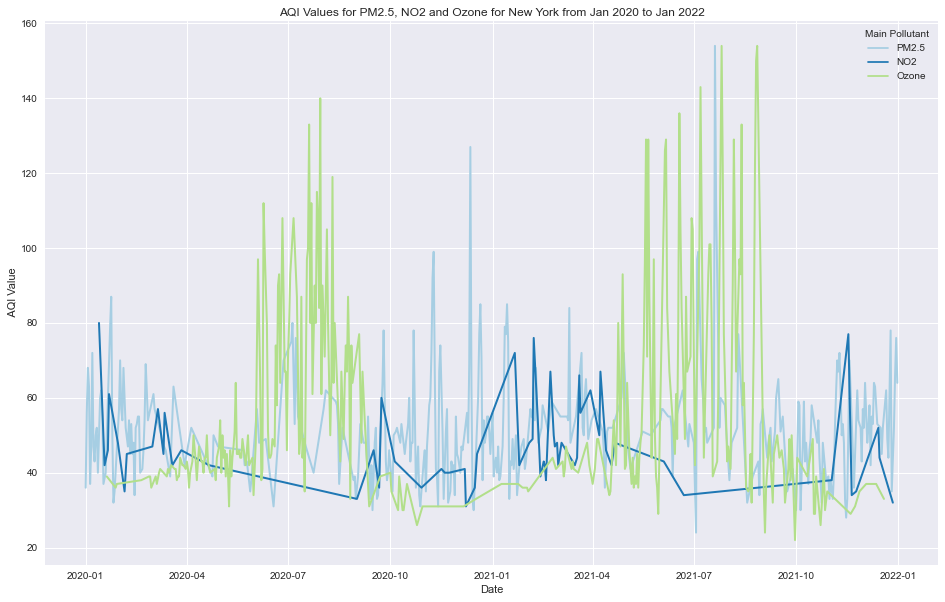

In [70]:
# Create time series for Main Pollutants
plt.style.use('seaborn')
plt.figure(figsize=(16,10))
sns.lineplot(data=pivoted2.reset_index(), x='Date', y=' AQI Value', hue='Main Pollutant', palette='Paired', linewidth= 2.0)
plt.title('AQI Values for PM2.5, NO2 and Ozone for New York from Jan 2020 to Jan 2022')
plt.show()

In [71]:
# Create separate df for each pollutant
pm25_ny = reset2[reset2["Main Pollutant"]=="PM2.5"]
no2_ny = reset2[reset2["Main Pollutant"]=="NO2"]
ozo_ny = reset2[reset2["Main Pollutant"]=="Ozone"]

In [72]:
print(pm25_ny.info())
print(no2_ny.info())
print(ozo_ny.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            361 non-null    datetime64[ns]
 1   Main Pollutant  361 non-null    object        
 2    AQI Value      361 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 12 to 726
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            64 non-null     datetime64[ns]
 1   Main Pollutant  64 non-null     object        
 2    AQI Value      64 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 19 to 718
Data columns (total 3 columns):
 #   Column       

In [88]:
# Find out 95% quantile for each main pollutant
print('PM2.5 95 quantile: ', pm25_la.quantile(0.95))
print('NO2 95 quantile: ', no2_ny.quantile(0.95))
print('Ozone 95 quantile: ', ozo_ny.quantile(0.95))

PM2.5 95 quantile:   AQI Value    147.7
Name: 0.95, dtype: float64
NO2 95 quantile:   AQI Value    71.25
Name: 0.95, dtype: float64
Ozone 95 quantile:   AQI Value    118.0
Name: 0.95, dtype: float64


In [89]:
# Averages for each pollutant
print('PM2.5 average: ', pm25_ny.mean())
print('NO2 average: ', no2_ny.mean())
print('Ozone average: ', ozo_ny.mean())

PM2.5 average:   AQI Value    51.936288
dtype: float64
NO2 average:   AQI Value    47.078125
dtype: float64
Ozone average:   AQI Value    57.245098
dtype: float64


In [90]:
# Create max threshold and find outliers from it
max_thresh2 = pm25_ny.quantile(0.95)
outliers4 = pm25_ny[pm25_ny[' AQI Value'].values > max_thresh2.values]
outliers4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 22 to 724
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            17 non-null     datetime64[ns]
 1   Main Pollutant  17 non-null     object        
 2    AQI Value      17 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 544.0+ bytes


In [91]:
# Do the same thing with min threshold, except set quantile to 5%
min_thresh2 = pm25_ny.quantile(0.05)
outliers5 = pm25_ny[pm25_ny[' AQI Value'].values > min_thresh2.values]
outliers5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            338 non-null    datetime64[ns]
 1   Main Pollutant  338 non-null    object        
 2    AQI Value      338 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.6+ KB


In [76]:
# Create new ds with no outliers beyond 95% quantile
pm25_ny20_nomaxthresh = pm25_ny[(pm25_ny[' AQI Value'].values < max_thresh2.values)]

In [77]:
# Save file
pm25_ny20_nomaxthresh.to_excel('ny_pm25_20to21.xlsx')

### Tampa, FL

In [78]:
df_tpa20 = pd.read_excel(r'D:\AQIdata\ad_viz_tile_data_tpa20.xlsx')
df_tpa20.head()

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,2020-01-01,108,PM2.5,SYDNEY,12-057-3002,AQS
1,2020-01-02,40,PM2.5,SYDNEY,12-057-3002,AQS
2,2020-01-03,38,PM2.5,USMC Reserve Center (Gandy),12-057-1065,AQS
3,2020-01-04,39,Ozone,Simmons Park,12-057-0081,AQS
4,2020-01-05,37,Ozone,Simmons Park,12-057-0081,AQS


In [80]:
df_tpa20.isnull().sum()

Date              0
 AQI Value        0
Main Pollutant    0
Site Name         0
Site ID           0
Source            0
dtype: int64

In [81]:
# Find unique values for 'Main Pollutant'
df_tpa20['Main Pollutant'].unique()

array(['PM2.5', 'Ozone', 'PM10'], dtype=object)

In [82]:
pivoted3 = df_tpa20.pivot_table(index=['Date', 'Main Pollutant'])
pivoted3

,,AQI Value
Date,Main Pollutant,
2020-01-01,PM2.5,108
2020-01-02,PM2.5,40
2020-01-03,PM2.5,38
2020-01-04,Ozone,39
2020-01-05,Ozone,37
...,...,...
2021-12-27,Ozone,40
2021-12-28,PM2.5,43
2021-12-29,PM2.5,34


In [83]:
reset3 = pivoted3.reset_index()
reset3

,Date,Main Pollutant,AQI Value
0,2020-01-01,PM2.5,108
1,2020-01-02,PM2.5,40
2,2020-01-03,PM2.5,38
3,2020-01-04,Ozone,39
4,2020-01-05,Ozone,37
...,...,...,...
726,2021-12-27,Ozone,40
727,2021-12-28,PM2.5,43
728,2021-12-29,PM2.5,34
729,2021-12-30,PM2.5,46


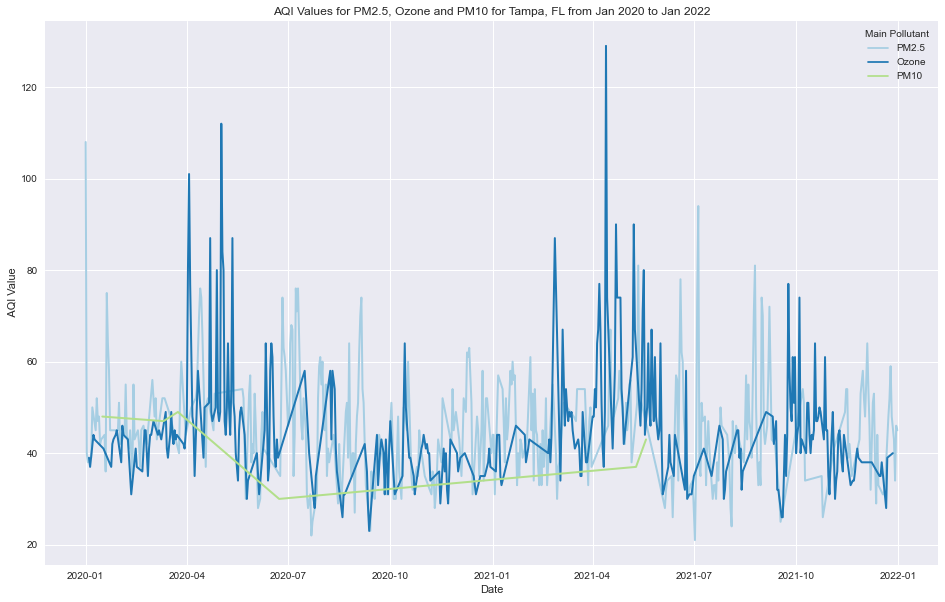

In [84]:
# Create time series for Main Pollutants
plt.style.use('seaborn')
plt.figure(figsize=(16,10))
sns.lineplot(data=pivoted3.reset_index(), x='Date', y=' AQI Value', hue='Main Pollutant', palette='Paired', linewidth= 2.0)
plt.title('AQI Values for PM2.5, Ozone and PM10 for Tampa, FL from Jan 2020 to Jan 2022')
plt.show()

In [85]:
# Create separate df for each pollutant
pm25_tpa = reset3[reset3["Main Pollutant"]=="PM2.5"]
ozo_tpa = reset3[reset3["Main Pollutant"]=="Ozone"]
pm10_tpa = reset3[reset3["Main Pollutant"]=="PM10"]

In [86]:
print(pm25_tpa.info())
print(ozo_tpa.info())
print(pm10_tpa.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            387 non-null    datetime64[ns]
 1   Main Pollutant  387 non-null    object        
 2    AQI Value      387 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 12.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 3 to 726
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            338 non-null    datetime64[ns]
 1   Main Pollutant  338 non-null    object        
 2    AQI Value      338 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 15 to 504
Data columns (total 3 columns):
 #   Column        

In [87]:
# Find out 95% quantile for each main pollutant
print('PM2.5 95 quantile: ', pm25_tpa.quantile(0.95))
print('Ozone 95 quantile: ', ozo_tpa.quantile(0.95))
print('PM10 95 quantile: ', pm10_tpa.quantile(0.95))

PM2.5 95 quantile:   AQI Value    69.4
Name: 0.95, dtype: float64
Ozone 95 quantile:   AQI Value    74.0
Name: 0.95, dtype: float64
PM10 95 quantile:   AQI Value    48.75
Name: 0.95, dtype: float64


In [92]:
# Averages for each pollutant
print('PM2.5 average: ', pm25_tpa.mean())
print('Ozone average: ', ozo_tpa.mean())
print('PM10 average: ', pm10_tpa.mean())

PM2.5 average:   AQI Value    45.963824
dtype: float64
Ozone average:   AQI Value    45.461538
dtype: float64
PM10 average:   AQI Value    42.333333
dtype: float64


In [97]:
# Create max threshold and find outliers from it
max_thresh3 = pm25_tpa.quantile(0.95)
outliers6 = pm25_tpa[pm25_tpa[' AQI Value'].values > max_thresh3.values]
outliers6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 615
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            20 non-null     datetime64[ns]
 1   Main Pollutant  20 non-null     object        
 2    AQI Value      20 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 640.0+ bytes


In [98]:
# Do the same thing with min threshold, except set quantile to 5%
min_thresh3 = pm25_tpa.quantile(0.05)
outliers7 = pm25_tpa[pm25_tpa[' AQI Value'].values > min_thresh3.values]
outliers7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            359 non-null    datetime64[ns]
 1   Main Pollutant  359 non-null    object        
 2    AQI Value      359 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.2+ KB


In [99]:
# Create new ds with no outliers beyond 95% quantile
pm25_tpa20_nomaxthresh = pm25_tpa[(pm25_tpa[' AQI Value'].values < max_thresh3.values)]

In [101]:
# Save file
pm25_tpa20_nomaxthresh.to_excel('tpa_pm25_20to21.xlsx')

# 1999 to 2022 data

All of the data we collected from 2019-2022 are what we'll use for correlation with green space and tree canopy percentage. However, for the models we'll feed the model with as much data as possible. Hence, we'll gather 23 years worth of AQI data for each city. Again, we'll implement the transformation methods we just used. 

In [102]:
pth = r'D:\AQIdata\air_cle_99to22.xlsx'
aqi_23years_cle = pd.read_excel(pth)
aqi_23years_cle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             7409 non-null   datetime64[ns]
 1   PM2.5 AQI Value  7409 non-null   int64         
 2   Main Pollutant   0 non-null      float64       
 3   Site Name        7375 non-null   object        
 4   Site ID          7409 non-null   object        
 5   Source           7409 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 347.4+ KB
